In [1]:
import argparse
import os
import zipfile
import joblib as pickle
from collections import OrderedDict
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

In [6]:
%ls

ModelPrototyping.ipynb  ModelTraining.ipynb


In [20]:
import pickle

def create_pickle(value=None, filename=None):
    """
    Serializes and saves a Python object to a file using pickle.

    This function takes a Python object and a filename, and serializes the object to a file with the specified name.
    If either the value or the filename is not provided, the function raises an exception.

    Parameters:
    - value: The Python object to serialize. Must not be None for the operation to proceed.
    - filename: The name of the file where the serialized object should be saved. Must not be None for the operation to proceed.

    Raises:
    - Exception: If either `value` or `filename` is None, indicating incomplete arguments for the operation.
    """
    if value is not None and filename is not None:
        with open(filename, "wb") as file:
            pickle.dump(value, file)
    else:
        raise Exception("Pickle file is empty".capitalize())

In [18]:
class Loader:
    """
    A Loader class for processing image datasets. This class is designed to handle the loading,
    extracting, and preprocessing of image data from a zip archive, preparing it for machine learning models.

    Attributes:
        image_path (str, optional): The path to the zip file containing the dataset. Default is None.
        batch_size (int): The number of images to process in each batch. Default is 64.
        image_height (int): The height to which each image will be resized. Default is 64 pixels.
        image_width (int): The width to which each image will be resized. Default is 64 pixels.
        normalized (bool): Flag to determine whether the images should be normalized. Default is True.
        raw_image_path (str): The path where extracted images are stored. Initially empty.
    """
    def __init__(self, image_path = None, batch_size = 64, image_height = 64, image_width = 64, normalized = True):
        """
        Initializes the Loader with the dataset path, batch size, image dimensions, and normalization flag.
        """
        self.image_path = image_path
        self.batch_size = batch_size
        self.image_height = image_height
        self.image_width = image_width
        self.normalized = normalized
        self.raw_image_path = ""

    def unzip_dataset(self, extract_to = None):
        """
        Extracts the dataset from a zip archive to a specified directory.

        Parameters:
            extract_to (str): The directory where the zip file contents will be extracted. If None, an exception is raised.

        Raises:
            Exception: If `extract_to` is None, indicating the path is not properly defined.
        """
        if extract_to is not None:
            with zipfile.ZipFile(file=self.image_path, mode="r") as zip_ref:
                zip_ref.extractall(path=extract_to)
        else:
            raise Exception("Path is not defined properly in unzip_dataset method".capitalize())

    def extract_features(self,):
        """
        Prepares the dataset by checking for or creating the necessary directories and unzipping the dataset.

        This method checks if a raw folder exists for the dataset; if not, it creates one and extracts the dataset there.
        """
        dataset_folder_name = "../data"
        extract_to = os.path.join(dataset_folder_name, "raw/")
        if os.path.exists(path = os.path.join(dataset_folder_name, "raw/")):
            print("raw folder already exists".title())
            try:
                self.unzip_dataset(extract_to = extract_to)
            except Exception as e:
                print("Error - {}".format(e))
            else:
                self.raw_image_path = os.path.join(dataset_folder_name, "raw/")
        else:
            print("raw folder does not exists and is about to create".title())
            try:
                os.makedirs(os.path.join(dataset_folder_name, "raw/"))
            except Exception as e:
                print("Error - {}".format(e))
            else:
                self.unzip_dataset(extract_to = extract_to)
                self.raw_image_path = os.path.join(dataset_folder_name, "raw/")

    def saved_dataloader(self, dataloader = None):
        """
        Saves the processed dataloader object to disk.

        Parameters:
            dataloader: The dataloader object to be saved. If None, an exception is raised.

        Raises:
            Exception: If `dataloader` is None, indicating it is not properly defined.
        """
        if dataloader is not None:
            processed_data_path = "../data"
            if os.path.exists(os.path.join(processed_data_path, "processed")):
                try:
                    create_pickle(value=dataloader, filename=os.path.join(processed_data_path, "processed/dataloader.pkl"))
                    print("done")
                except Exception as e:
                    print("Error - {}".format(e))
            else:
                print("Processed data folder is not exists and is about to create".capitalize())
                os.makedirs(os.path.join(processed_data_path, "processed"))
                try:
                    create_pickle(
                        value=dataloader,
                        filename=os.path.join(
                            processed_data_path, "processed/dataloader.pkl"
                        ),
                    )
                except Exception as e:
                    print("Error - {}".format(e))
        else:
            raise Exception("Dataloader is not defined properly in saved_dataloader method".capitalize())

    def create_dataloader(self):
        """
        Creates a dataloader with the specified transformations and batch size for the dataset.

        Returns:
            DataLoader: The DataLoader object for the dataset, ready for use in training or evaluation.
        """
        transform = transforms.Compose(
            [
                transforms.Resize((self.image_height, self.image_width)),
                transforms.ToTensor(),
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
            ]
        )
        dataset = datasets.ImageFolder(root=self.raw_image_path, transform=transform)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.saved_dataloader(dataloader = dataloader)

        return dataloader

"""
if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Image Preprocessing".capitalize())
    
    parser.add_argument("--image_path", help="Define the Image path".capitalize())
    parser.add_argument("--batch_size", default=64, type=int, help="Define the Batch Size".capitalize())
    parser.add_argument("--image_height", default=64, type=int, help="Define the Image Height".capitalize())
    parser.add_argument("--image_width", default=64, type=int, help="Define the Image Width".capitalize())
    
    args = parser.parse_args()
    
    if args.image_path is None:
        if args.batch_size and args.image_height and args.image_width:
            loader = Loader(
                image_path=args.image_path,
                batch_size=args.batch_size,
                image_height=args.image_height,
                image_width=args.image_width,
                normalized=True,
            )
            
            loader.extract_features()
            
            dataloader = loader.create_dataloader()
            
        else:
            raise ValueError("Please provide the image path".capitalize())
    else:
        raise ValueError("Please provide the image path".capitalize())
"""

'\nif __name__ == "__main__":\n    parser = argparse.ArgumentParser(description="Image Preprocessing".capitalize())\n    \n    parser.add_argument("--image_path", help="Define the Image path".capitalize())\n    parser.add_argument("--batch_size", default=64, type=int, help="Define the Batch Size".capitalize())\n    parser.add_argument("--image_height", default=64, type=int, help="Define the Image Height".capitalize())\n    parser.add_argument("--image_width", default=64, type=int, help="Define the Image Width".capitalize())\n    \n    args = parser.parse_args()\n    \n    if args.image_path is None:\n        if args.batch_size and args.image_height and args.image_width:\n            loader = Loader(\n                image_path=args.image_path,\n                batch_size=args.batch_size,\n                image_height=args.image_height,\n                image_width=args.image_width,\n                normalized=True,\n            )\n            \n            loader.extract_features()\n  

In [31]:
# Call the Loader class with arguments
if __name__ == "__main__":
    loader = Loader(
        image_path="/Users/shahmuhammadraditrahman/Desktop/archive.zip",
        batch_size=64,
        image_height=64,
        image_width=64,
        normalized=True,
    )
    
    dataloader = loader.extract_features()
    loader.create_dataloader()

Raw Folder Already Exists
done


#### Plot the Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

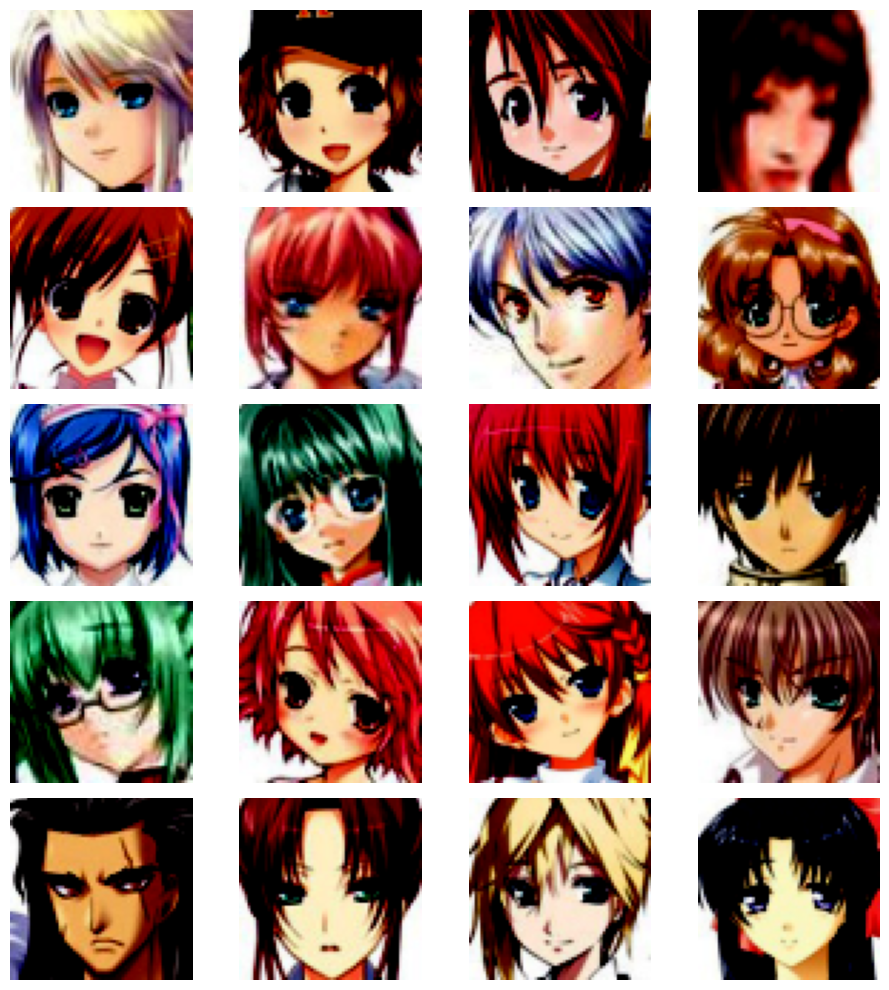

In [29]:
import joblib as pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def plot_images(dataloader_path):
    """
    This script loads a preprocessed dataset from a Pickle file and displays the first 20 images in a 5x4 grid format.

    The dataset is expected to be a dataloader object serialized with joblib (pickle), containing batches of images and their corresponding labels. The script iterates over the first batch of images, detaches them from any computational graph, and converts them from PyTorch tensors to numpy arrays for visualization. The images are assumed to be in the format (C, H, W) where C is the number of channels, H is the height, and W is the width of the images. The script transposes each image to (H, W, C) format suitable for plotting with matplotlib.

    Dependencies:
    - joblib: For loading the serialized dataloader object.
    - matplotlib: For plotting the images.
    - PyTorch: The script assumes that the dataloader returns PyTorch tensors.

    Usage:
    Ensure that the path to the dataloader pickle file (`dataloader_path`) is correctly set relative to the script's execution directory. The script checks for the existence of the specified file, loads the dataloader, retrieves the first batch of images, and plots them in a grid. If the file does not exist, it prints an error message.

    Warning suppression is enabled to ignore any warnings that might clutter the output, focusing solely on the visualization task.

    Note:
    This script is designed for visualization purposes and assumes the images have already been preprocessed and are ready for display. It does not perform any image preprocessing steps such as normalization or resizing.
    """
    if os.path.exists(dataloader_path):
        dataloader = pickle.load(dataloader_path)
        images, _ = next(iter(dataloader))
        images = images[0:20]
        
        plt.figure(figsize=(10, 10))
        
        for index, image in enumerate(images):
            plt.subplot(5, 4, index + 1)
            plt.imshow(image.cpu().detach().numpy().transpose(1, 2, 0))
            plt.axis("off")
            plt.tight_layout()
        
        plt.show()
    else:
        print("Processed data does not exist".capitalize())

if __name__ == "__main__":
    dataloader_path = "../data/processed/dataloader.pkl"
    plot_images(dataloader_path = dataloader_path)

In [17]:
def total_params(model):
    total_params = sum(params.numel() for params in model.parameters())
    print(total_params)

#### Create the Discriminator model

In [23]:
class Discriminator(nn.Module):
    def __init__(self, image_size = 64):
        self.image_size = image_size
        self.input_channels = 3
        self.kernel_size = 4
        self.stride = 2
        self.padding = 1
        self.negative_slope = 0.2

        super(Discriminator, self).__init__()

        self.layers_config = [
            (
                self.input_channels,self.image_size,self.kernel_size,self.stride,self.padding,self.negative_slope,True,
            ),
            (
                self.image_size,self.image_size * 2,self.kernel_size,self.stride,self.padding,self.negative_slope,True,
            ),
            (
                self.image_size * 2,self.image_size * 4,self.kernel_size,self.stride,self.padding,self.negative_slope,True,
            ),
            (
                self.image_size * 4,self.image_size * 8,self.kernel_size,self.stride,self.padding,self.negative_slope,True,
            ),
            
            (
                self.image_size * 8, 1, self.kernel_size, self.stride//2, 0,
            )
        ]
        
        self.model = self.connected_layer(layers_config=self.layers_config)

    def connected_layer(self, layers_config = None):
        layers = OrderedDict()
        if layers_config is not None:
            for index, (in_channels, out_channels, kernel_size, stride, padding, negative_slope, inplace) in enumerate(layers_config[:-1]):
                layers["{}_conv".format(index + 1)] = nn.Conv2d(
                    in_channels = in_channels,
                    out_channels = out_channels,
                    kernel_size = kernel_size,
                    stride=stride,
                    padding = padding,
                    bias=False)
    
                
                layers["{}_activation".format(index + 1)] = nn.LeakyReLU(
                    negative_slope=negative_slope, inplace=inplace)
                
                if index != 0:
                    layers["{}_batch_norm".format(index + 1)] = nn.BatchNorm2d(num_features=out_channels)

                    
            in_channels, out_channels, kernel_size, stride, padding = layers_config[-1]
            layers["out_layer"] = nn.Conv2d(
                in_channels=in_channels,out_channels=out_channels,
                kernel_size=kernel_size,
                stride=stride,
                padding=padding,
                bias=False)
            
            layers["out_activation"] = nn.Sigmoid()
            
            return nn.Sequential(layers)
                
        else:
            raise Exception("Layers config is not defined properly".capitalize())

    def forward(self, x):
        if x is not None:
            x = self.model(x)
            return x.view(-1, 1).squeeze(1)
        else:
            raise Exception("Input is not defined properly".capitalize())

In [24]:
discriminator = Discriminator(image_size=64)
discriminator

Discriminator(
  (model): Sequential(
    (1_conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1_activation): LeakyReLU(negative_slope=0.2, inplace=True)
    (2_conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (2_activation): LeakyReLU(negative_slope=0.2, inplace=True)
    (2_batch_norm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3_conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3_activation): LeakyReLU(negative_slope=0.2, inplace=True)
    (3_batch_norm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4_conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4_activation): LeakyReLU(negative_slope=0.2, inplace=True)
    (4_batch_norm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (out_layer): Conv2d(512, 1,

In [25]:
noise_data = torch.randn(64, 3, 64, 64)
discriminator(noise_data).shape

torch.Size([64])

In [26]:
total_params(model = discriminator)

2765568
